# Note: Last Cell Performs (Localization+Classification)
### The rest is code from classificaiton file 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
import csv

In [2]:
def HoGFeatures(img):
    #img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # create HoG Object
    # winSize is the size of the image cropped to an multiple of the cell size
    hog = cv2.HOGDescriptor(_winSize=(img.shape[1] // cell_size[1] * cell_size[1],
                                  img.shape[0] // cell_size[0] * cell_size[0]),
                        _blockSize=(block_size[1] * cell_size[1],
                                    block_size[0] * cell_size[0]),
                        _blockStride=(cell_size[1], cell_size[0]),
                        _cellSize=(cell_size[1], cell_size[0]),
                        _nbins=nbins)
    
    n_cells = (img.shape[0] // cell_size[0], img.shape[1] // cell_size[1])
    
    # Compute HoG features
    hog_feats = hog.compute(img)\
               .reshape(n_cells[1] - block_size[1] + 1,
                        n_cells[0] - block_size[0] + 1,
                        block_size[0], block_size[1], nbins) \
               .transpose((1, 0, 2, 3, 4))  # index blocks by rows first
    
    # hog_feats now contains the gradient amplitudes for each direction,for each cell of its group for each group.
    # Indexing is by rows then columns.
    
    # computation for BlockNorm
    gradients = np.full((n_cells[0], n_cells[1], nbins), 0, dtype=float)
    cell_count = np.full((n_cells[0], n_cells[1], 1), 0, dtype=int)
    
    for off_y in range(block_size[0]):
        for off_x in range(block_size[1]):
            gradients[off_y:n_cells[0] - block_size[0] + off_y + 1,
                      off_x:n_cells[1] - block_size[1] + off_x + 1] += \
                hog_feats[:, :, off_y, off_x, :]
            cell_count[off_y:n_cells[0] - block_size[0] + off_y + 1,
                       off_x:n_cells[1] - block_size[1] + off_x + 1] += 1
    
    # Average gradients
    gradients /= cell_count
    
    return gradients

In [3]:
# parameters to be changed
size = (128, 128)
train_image_num = 300

class_num = 11

block_size = (2, 2)
cell_size = (8, 8)
nbins = 8

clf = svm.SVC(gamma=0.001, C=100.)
knn = KNeighborsClassifier (n_neighbors=3)

train_size_fraction=0.7

In [4]:
class_label = []
train = []

# load the images
directory_bus = "./MIO-TCD-Classification/train/bus/"
load_bus = os.listdir(directory_bus)
bus = []

directory_pedestrain = "./MIO-TCD-Classification/train/pedestrian/"
load_pedestrain = os.listdir(directory_pedestrain)
pedestrain = []

directory_bicycle = "./MIO-TCD-Classification/train/bicycle/"
load_bicycle = os.listdir(directory_bicycle)
bicycle = []

directory_car = "./MIO-TCD-Classification/train/car/"
load_car = os.listdir(directory_car)
car = []

directory_background = "./MIO-TCD-Classification/train/background/"
load_background = os.listdir(directory_background)
background = []

directory_articulated_truck = "./MIO-TCD-Classification/train/articulated_truck/"
load_articulated_truck = os.listdir(directory_articulated_truck)
articulated_truck = []

directory_motorcycle = "./MIO-TCD-Classification/train/motorcycle/"
load_motorcycle= os.listdir(directory_motorcycle)
motorcycle = []

directory_non_motorized_vehicle = "./MIO-TCD-Classification/train/non-motorized_vehicle/"
load_non_motorized_vehicle= os.listdir(directory_non_motorized_vehicle)
non_motorized_vehicle = []

directory_pickup_truck = "./MIO-TCD-Classification/train/pickup_truck/"
load_pickup_truck= os.listdir(directory_pickup_truck)
pickup_truck = []

directory_single_unit_truck = "./MIO-TCD-Classification/train/single_unit_truck/"
load_single_unit_truck= os.listdir(directory_single_unit_truck)
single_unit_truck = []


directory_work_van = "./MIO-TCD-Classification/train/work_van/"
load_work_van= os.listdir(directory_work_van)
work_van = []


names = ["bus", "pedestrian", "bicycle", "car", "background", "articulated_truck", "motorcycle", 
         "non_motorized_vehicle", "pickup_truck", "single_unit_truck", "work_van"]

class_list = [bus, pedestrain, bicycle, car, background, articulated_truck, motorcycle, non_motorized_vehicle, 
              pickup_truck, single_unit_truck, work_van]
directory_list = [directory_bus, directory_pedestrain, directory_bicycle, directory_car, directory_background, 
                  directory_articulated_truck, directory_motorcycle, directory_non_motorized_vehicle,
                 directory_pickup_truck, directory_single_unit_truck, directory_work_van]
load_path = [load_bus, load_pedestrain, load_bicycle, load_car, load_background, load_articulated_truck, 
             load_motorcycle, load_non_motorized_vehicle, load_pickup_truck, load_single_unit_truck, load_work_van]


# randomly load 300 images for each category from the original dataset which containing over 600k images.
# In total, the list "train" contains 300 * 11 = 3300 images. And the list "class_label" contains the groud truth labels for these corresponding images.
# The index for the images and corresponding labels stored in "train" and "class_label" matches.
for j in range (class_num):
    
    for i in range(train_image_num):
        img = cv2.cvtColor(cv2.imread(directory_list[j] + load_path[j][i]), cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, size)     
        class_list[j].append(img)
        train.append(img)
        class_label.append(names[j])

# split the "train" and "class_label" into training subset and testing subset
X_train, X_test, Y_train, Y_test = train_test_split(train, class_label, train_size=train_size_fraction, shuffle=True)

# use X_train  Y_train only for training 
print("The total number of images in train list :", len(train))
print("The actual used number of training images used by spliting the traning list: X_train", len(X_train))
print("The actual used number of training labels used by spliting the traning list: Y_train", len(Y_train))



The total number of images in train list : 3300
The actual used number of training images used by spliting the traning list: X_train 2310
The actual used number of training labels used by spliting the traning list: Y_train 2310


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [5]:
# compute and store the HoG features
def HOG (train):
    # Create a list to store HoG features of the training images
    HoGTrain = []

    # loop through all training images, call the HoGFeatures(img) function to compute the corresponding HoG feature 
    # for each training image and store it into HoGTrain[] list
    for i in range(len(train)):
        HoGTrain.append(HoGFeatures(train[i]))
        
    HoGTrain = np.reshape(HoGTrain, (len(HoGTrain), -1))
    return HoGTrain

In [6]:
# plot the confusion matrix
def conf (label, predict, classes): 
    conf_plot = confusion_matrix(label, predict)
    conf_plot = conf_plot.astype('float') / conf_plot.sum(axis=1)[:, np.newaxis]
    plt.figure()
    plt.imshow(conf_plot)
    plt.title("Normalized Confusion Matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes, rotation=0)
    plt.colorbar()
    plt.show()


In [7]:
# cast a 1d array to list
def toList(array):
    list = []
    for i in range (array.shape[0]):
        list.append(array[i])
    return list 

In [8]:
# calculate the accuracy 
def accuracy(label, predict):
    score = 0
    for i in range (len(predict)):
        if (label[i] == predict[i]):
            score = score + 1
    return score/len(predict)
 

In [9]:
# input two arrays of different size
# compute number of TPs (number of duplicates in two arrays)
def distribution (GT, pre):
    TP = 0
    for i in range (len(GT)):
        if GT[i] in pre:
            TP = TP + 1
    return TP
    

In [10]:
# compute both precision and recall
def compute_precision_recall(GT_f, prediction_f):
    
    print("Number of Ground Truth of current class", len(GT_f))
    print("Number of Prediction of current class", len(prediction_f))

    # cast list to array
    GT_f = np.array(GT_f)
    prediction_f = np.array(prediction_f)

    precision_list = []
    recall_list = []
    
    for i in range(len(names)):
        GT_idx = np.where(GT_f==names[i])
        pre_idx = np.where(prediction_f==names[i])
        print("---------------------------------------------------------------")
        print("Current class: ", names[i])
        print("Prediction index", pre_idx[0])
        print("Groud Truth index", GT_idx[0])
    
        # matched: truth positive
        true_pos = distribution(GT_idx[0], pre_idx[0])
        # in gt, but not in pre : false negative 
        false_neg = len(GT_idx[0]) - true_pos
        # in pre but not in gt : false positive
        false_pos = len(pre_idx[0]) - true_pos
    
        print("Number of true positives:", true_pos)
        print("Number of false positives:", false_pos)
        print("Number of false negatives:", false_neg)
       
        # calculate precision and recall  
        if((false_pos+true_pos)== 0):
            precision = 0
        else:
            precision = true_pos / (true_pos + false_pos)
        
        if((false_neg+true_pos)== 0):
            recall = 0
        else:
            recall = true_pos / (true_pos + false_neg)
        
        
        precision_list.append(precision)
        recall_list.append(recall)
        
        print("Precision for", names[i], "is", precision * 100, "%")
        print("Recall for", names[i], "is", recall*100, "%")
    
    return precision_list, recall_list


## Contains Confusion matrix images for each fold of cross validations

Cross-validation: fold 1
------------------------------------------------------------------------
Classification Accuracy---------------------------------- 48.484848484848484 %
------------------------------------------------------------------------

Calculation for Precision and Recall:
-------------------------------------------------------------------
Number of Ground Truth of current class 231
Number of Prediction of current class 231
---------------------------------------------------------------
Current class:  bus
Prediction index [  1  10  50  65  71  75  77  85  95  96 105 108 148 155 182 199 207 212
 218]
Groud Truth index [ 10  15  35  50  51  85  95  96 105 108 155 159 182 207 212 218 228]
Number of true positives: 12
Number of false positives: 7
Number of false negatives: 5
Precision for bus is 63.1578947368421 %
Recall for bus is 70.58823529411765 %
---------------------------------------------------------------
Current class:  pedestrian
Prediction index [  8   9  36  37

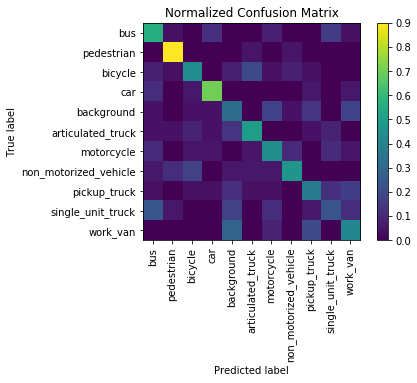





Cross-validation: fold 2
------------------------------------------------------------------------
Classification Accuracy---------------------------------- 52.38095238095239 %
------------------------------------------------------------------------

Calculation for Precision and Recall:
-------------------------------------------------------------------
Number of Ground Truth of current class 231
Number of Prediction of current class 231
---------------------------------------------------------------
Current class:  bus
Prediction index [  6   7  18  25  29  35  39  40  45  46  72  74 102 103 114 167 193 203
 207]
Groud Truth index [  6  35  37  45  46 102 103 130 193 201]
Number of true positives: 7
Number of false positives: 12
Number of false negatives: 3
Precision for bus is 36.84210526315789 %
Recall for bus is 70.0 %
---------------------------------------------------------------
Current class:  pedestrian
Prediction index [ 30  58  80  83  98 110 112 113 121 150 156 178 180 

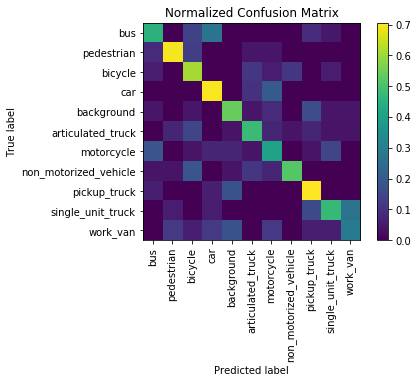





Cross-validation: fold 3
------------------------------------------------------------------------
Classification Accuracy---------------------------------- 48.484848484848484 %
------------------------------------------------------------------------

Calculation for Precision and Recall:
-------------------------------------------------------------------
Number of Ground Truth of current class 231
Number of Prediction of current class 231
---------------------------------------------------------------
Current class:  bus
Prediction index [ 11  12  13  24  25  35  56  57  71  87  90  91  92 120 135 148 150 152
 153 157 180 189 193 197 206 215 225]
Groud Truth index [  2  11  13  25  35  56  57  76  87  90  96 105 113 114 118 135 148 150
 157 158 159 178 180 197 206 225]
Number of true positives: 16
Number of false positives: 11
Number of false negatives: 10
Precision for bus is 59.25925925925925 %
Recall for bus is 61.53846153846154 %
------------------------------------------------

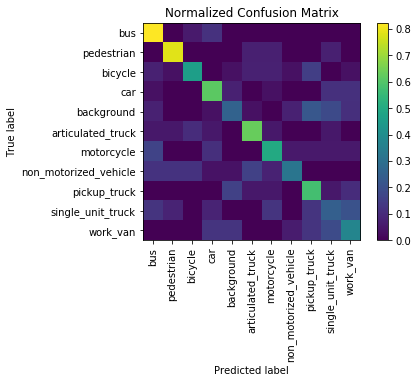





Cross-validation: fold 4
------------------------------------------------------------------------
Classification Accuracy---------------------------------- 45.45454545454545 %
------------------------------------------------------------------------

Calculation for Precision and Recall:
-------------------------------------------------------------------
Number of Ground Truth of current class 231
Number of Prediction of current class 231
---------------------------------------------------------------
Current class:  bus
Prediction index [ 51  92 100 173 174 194 207 208 222 226 228]
Groud Truth index [  9  14  51  65  84  85  92 140 145 167 179 207 208 222 226 228]
Number of true positives: 7
Number of false positives: 4
Number of false negatives: 9
Precision for bus is 63.63636363636363 %
Recall for bus is 43.75 %
---------------------------------------------------------------
Current class:  pedestrian
Prediction index [ 23  48  50  60  67  72  76  95 109 126 143 146 172 179 180 1

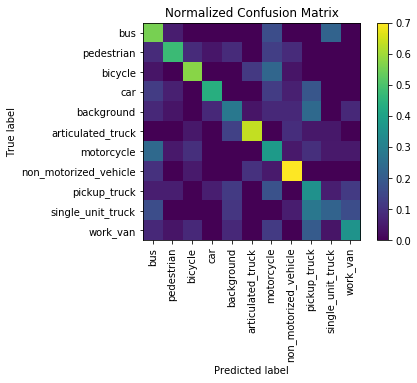





Cross-validation: fold 5
------------------------------------------------------------------------
Classification Accuracy---------------------------------- 47.18614718614719 %
------------------------------------------------------------------------

Calculation for Precision and Recall:
-------------------------------------------------------------------
Number of Ground Truth of current class 231
Number of Prediction of current class 231
---------------------------------------------------------------
Current class:  bus
Prediction index [  6  13  38  70  71  85  86  87  90 105 113 116 120 123 126 128 143 156
 163 168 169 186 199 202]
Groud Truth index [  6  13  19  20  38  70  71  72  85  86  90 105 111 113 116 120 126 129
 147 151 154 163 168 169 186 192 199]
Number of true positives: 18
Number of false positives: 6
Number of false negatives: 9
Precision for bus is 75.0 %
Recall for bus is 66.66666666666666 %
---------------------------------------------------------------
Current 

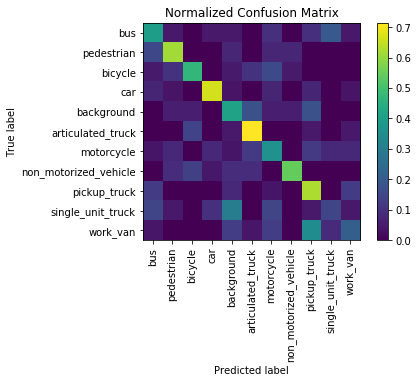





Cross-validation: fold 6
------------------------------------------------------------------------
Classification Accuracy---------------------------------- 48.05194805194805 %
------------------------------------------------------------------------

Calculation for Precision and Recall:
-------------------------------------------------------------------
Number of Ground Truth of current class 231
Number of Prediction of current class 231
---------------------------------------------------------------
Current class:  bus
Prediction index [  2  11  13  44  56  64  70  71  85 108 154 156 162 163 182 188 195 201
 214]
Groud Truth index [  2  11  14  26  29  44  54  56  70 129 136 150 162 173 182 188 198]
Number of true positives: 8
Number of false positives: 11
Number of false negatives: 9
Precision for bus is 42.10526315789473 %
Recall for bus is 47.05882352941176 %
---------------------------------------------------------------
Current class:  pedestrian
Prediction index [  8  18  43

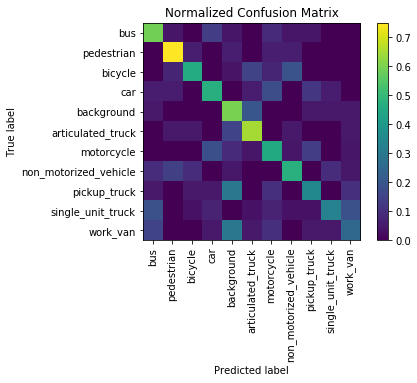





Cross-validation: fold 7
------------------------------------------------------------------------
Classification Accuracy---------------------------------- 50.21645021645021 %
------------------------------------------------------------------------

Calculation for Precision and Recall:
-------------------------------------------------------------------
Number of Ground Truth of current class 231
Number of Prediction of current class 231
---------------------------------------------------------------
Current class:  bus
Prediction index [ 18  22  24  26  34  47  56  63  71  78  91  93  95  98 100 104 112 115
 117 129 140 141 152 171 176 178 192 198 199 218 227]
Groud Truth index [ 18  21  26  42  65  67  71  74  78  87  91  93  95 100 104 112 115 140
 152 171 175 176 178 187 192 199 218]
Number of true positives: 19
Number of false positives: 12
Number of false negatives: 8
Precision for bus is 61.29032258064516 %
Recall for bus is 70.37037037037037 %
------------------------------

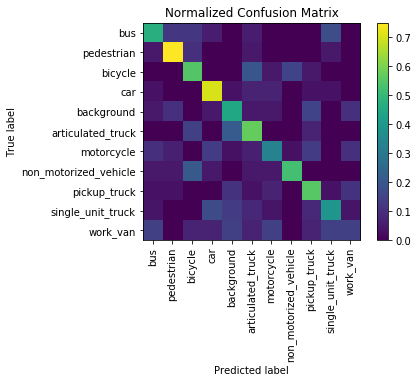





Cross-validation: fold 8
------------------------------------------------------------------------
Classification Accuracy---------------------------------- 49.78354978354979 %
------------------------------------------------------------------------

Calculation for Precision and Recall:
-------------------------------------------------------------------
Number of Ground Truth of current class 231
Number of Prediction of current class 231
---------------------------------------------------------------
Current class:  bus
Prediction index [  3   8  15  19  40  55  62  72  75  77  78  87  90 145 162 164 166 195
 196 217]
Groud Truth index [  3   8  18  19  40  77  87  90 145 162 164 180 196 213 216 227]
Number of true positives: 11
Number of false positives: 9
Number of false negatives: 5
Precision for bus is 55.00000000000001 %
Recall for bus is 68.75 %
---------------------------------------------------------------
Current class:  pedestrian
Prediction index [  4  24  45  48  49  54

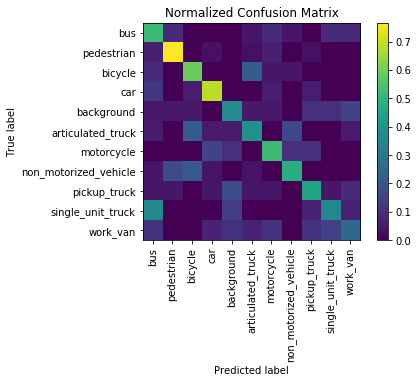





Cross-validation: fold 9
------------------------------------------------------------------------
Classification Accuracy---------------------------------- 50.649350649350644 %
------------------------------------------------------------------------

Calculation for Precision and Recall:
-------------------------------------------------------------------
Number of Ground Truth of current class 231
Number of Prediction of current class 231
---------------------------------------------------------------
Current class:  bus
Prediction index [ 41  52  55  61  62  70  71  78 109 124 125 172 178 179 180 194 196 214]
Groud Truth index [  2  41  55  60  62  70  72  73  78  91  92 100 122 124 125 128 130 152
 172 173 178 179 180 186 190 194 225]
Number of true positives: 12
Number of false positives: 6
Number of false negatives: 15
Precision for bus is 66.66666666666666 %
Recall for bus is 44.44444444444444 %
---------------------------------------------------------------
Current class:  pe

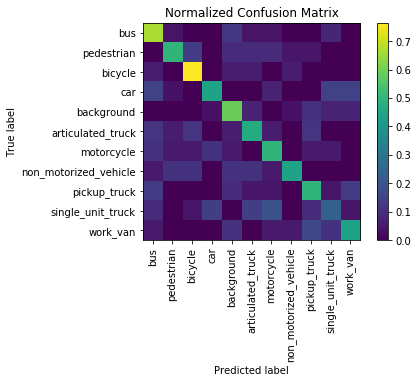





Cross-validation: fold 10
------------------------------------------------------------------------
Classification Accuracy---------------------------------- 49.35064935064935 %
------------------------------------------------------------------------

Calculation for Precision and Recall:
-------------------------------------------------------------------
Number of Ground Truth of current class 231
Number of Prediction of current class 231
---------------------------------------------------------------
Current class:  bus
Prediction index [ 19  28  30  32  33  37  46  48  53  70  72  79 105 113 117 131 139 157
 172 177 180 184 193 196 203 225]
Groud Truth index [ 23  30  36  37  46  57  70  79 105 113 117 122 131 157 172 177 180 184
 225 228]
Number of true positives: 15
Number of false positives: 11
Number of false negatives: 5
Precision for bus is 57.692307692307686 %
Recall for bus is 75.0 %
---------------------------------------------------------------
Current class:  pedestria

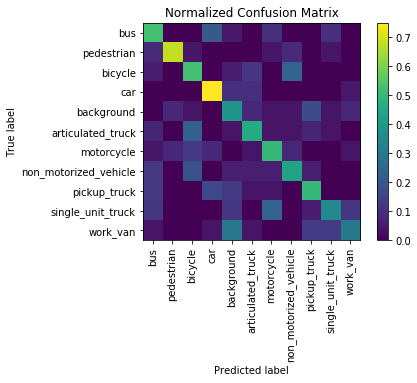

In [11]:
# svm classifier
# cross validation

# Initialize the class with the number of folds:
kf_splitter = KFold(n_splits=10)


X_train = np.array(X_train)
Y_train = np.array(Y_train)

a = 0
accuracy_array = np.zeros(10)
precision_matrix = np.zeros((10, 11))
recall_matrix = np.zeros((10, 11))
total_prediction = []
total_GT = []

# train_index= 9/10 X_train; valid_index =  1/10 X_train
for train_index, valid_index in kf_splitter.split(X_train):   #10
    # print(valid_index[0])
    # Get our training data in this fold
    kX_train = X_train[train_index, :]  # all training images
    kY_train = Y_train[train_index]     # all training labels
    
    # Get our validation data in this fold
    kX_valid = X_train[valid_index, :]   # all testing images
    kY_valid = Y_train[valid_index]      # all testing labels
    
    # Hog 
    kX_train = HOG (kX_train)
    clf.fit(kX_train, kY_train)
    
    kX_valid= HOG (kX_valid)
    
    # svm prediction
    prediction_valid = clf.predict(kX_valid)
    
    print("Cross-validation: fold", str(a+1))
    print("------------------------------------------------------------------------")
    
    # cast 1d array to list 
    kY_valid = toList(kY_valid)
    prediction_valid = toList(prediction_valid)
    
    # for accuracy calculation
    acc = accuracy (kY_valid, prediction_valid)
    print("Classification Accuracy----------------------------------", acc*100, "%")
    print("------------------------------------------------------------------------\n")
    print("Calculation for Precision and Recall:")
    print("-------------------------------------------------------------------")
    
    precision, recall = compute_precision_recall(kY_valid, prediction_valid)
    
    accuracy_array[a] = acc
    precision_matrix[a, :] = precision
    recall_matrix[a, :] = recall
    
    a = a+1

    # call above function to plot the confusion matrix
    conf (kY_valid, prediction_valid, names)
    print("\n")
    print("\n")
  

In [12]:
# print out the overall result, includes: average accuracy, precision and recall for each class

print("Average accuracy across validations:", np.mean(accuracy_array)*100, "%") 
print("Standard deviation:", np.std(accuracy_array))

print("\n")
print("Average precision and recall across validations for each class:") 

average_precision = precision_matrix.mean(0)
average_recall = recall_matrix.mean(0)
for i in range(11):
    print("----------------------------------------------------------------------")
    print("Current class:", names[i])
    print("Average precision:", average_precision[i]*100, "%")
    print("Average recall:", average_recall[i]*100, "%")


Average accuracy across validations: 49.004329004329 %
Standard deviation: 0.018345991428932545


Average precision and recall across validations for each class:
----------------------------------------------------------------------
Current class: bus
Average precision: 58.06501829931372 %
Average recall: 61.81670018434724 %
----------------------------------------------------------------------
Current class: pedestrian
Average precision: 62.97504129857072 %
Average recall: 49.172728789410044 %
----------------------------------------------------------------------
Current class: bicycle
Average precision: 55.01197696606243 %
Average recall: 54.598220596053416 %
----------------------------------------------------------------------
Current class: car
Average precision: 39.378828106802935 %
Average recall: 42.13190443040355 %
----------------------------------------------------------------------
Current class: background
Average precision: 66.10529011012079 %
Average recall: 69.234967930

# Localization+Classificaiton

In [13]:
length = 0
label = []
label_number=[]
images = []
size=(128,128)
# open csv file with groundtruth
with open('corretLabels.csv') as csvfile:
    label_reader = csv.reader(csvfile, delimiter=',')
    for row in label_reader:
        label.append([row[0],row[1]])
        length=length+1
# sort the label since the read in sequence could be different on different os
label=sorted(label)
label_sorted = []

# get only the labels excluding the img number
for i in range(len(label)):
    label_sorted.append(label[i][1])
directory_result_image = "./result_images/"
load_result_image = sorted(os.listdir(directory_result_image))

# load the img with gray_scale
for i in range (1,len(load_result_image)):
    images.append(cv2.cvtColor(cv2.imread(directory_result_image + load_result_image[i]),cv2.COLOR_BGR2GRAY))
# resize image for HOG purposes
for i in range (len(images)):
    images[i]=cv2.resize(images[i],size)
# do hog on input images
images= HOG(images)
# use trained classifier to predict the input images
prediction_valid = clf.predict(images)
prediction_valid = toList(prediction_valid)
    
# for accuracy calculation
acc = accuracy (label_sorted, prediction_valid)
print("accuracy---------------------------------------", acc*100, "%")
precision, recall = compute_precision_recall(label_sorted, prediction_valid)

accuracy--------------------------------------- 16.52267818574514 %
Number of Ground Truth of current class 926
Number of Prediction of current class 926
---------------------------------------------------------------
Current class:  bus
Prediction index [  4  12  30  38  42  65  77 106 120 125 134 162 194 201 202 208 218 226
 257 290 294 308 322 325 326 387 412 480 492 518 543 545 553 563 572 592
 594 608 618 645 655 657 660 681 710 711 715 719 740 755 756 762 779 845
 847 853 866 887 911 913]
Groud Truth index [ 45 140 168 251 269 290 301 311 316 323 328 335 357 359 429 440 476 492
 540 545 557 563 568 579 639 640 642 645 732 776 858 862 873 890]
Number of true positives: 5
Number of false positives: 55
Number of false negatives: 29
Precision for bus is 8.333333333333332 %
Recall for bus is 14.705882352941178 %
---------------------------------------------------------------
Current class:  pedestrian
Prediction index [  3   6   8  17  20  34  36  47  49  59  63  67  71  72  80  98 10